In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Latitude/Longitude Distance Calculator online tool
http://www.meridianoutpost.com/resources/etools/calculators/calculator-latitude-longitude-distance.php?

### This function calculates latitude/longitude distance 

In [49]:
# Python 3 program to calculate Distance Between Two Points on Earth 
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles. Use 6371 for kilometers 
    r = 3956
       
    # calculate the result 
    return(c * r) 
      
      
# driver code  
lat1 = 53.32055555555556
lat2 = 53.31861111111111
lon1 = -1.7297222222222221
lon2 =  -1.6997222222222223
print(distance(lat1, lat2, lon1, lon2), "miles") 

1.2445894158220852 miles


# Railroad Segments

In [51]:
file1 = "C:/Users/jkhat/OneDrive/MarTREC_python/Rail_consolidated_arcs_file_2.csv"
df_rail = pd.read_csv(file1)

In [52]:
print(df_rail.shape)
df_rail.head()

(1269, 10)


,FID,Start_Node,End_Node,Mode,X_Start,Y_Start,X_End,Y_End,Length_mi,Traversal time
0,591,30569,30570,Rail,-94.649024,34.034692,-94.630256,34.038541,1.114618,1.0
1,1083,31049,31021,Rail,-94.618961,35.082830,-94.607896,35.059841,1.707343,1.0
2,1336,31280,31279,Rail,-94.440744,35.397594,-94.441901,35.447053,3.459341,1.0
3,1298,31232,31242,Rail,-94.430066,35.376320,-94.429916,35.387689,0.790110,1.0
4,1293,31232,31237,Rail,-94.430066,35.376320,-94.426151,35.383089,0.516456,1.0


In [53]:
for index, row in df_rail.iterrows():
    lat1 = row['Y_Start']
    lat2 = row['Y_End']
    lon1 = row['X_Start']
    lon2 = row['X_End']
    distance_mile = distance(lat1, lat2, lon1, lon2)
    df_rail.at[index, 'new_Length_mi'] = distance_mile

In [54]:
df_rail[df_rail['FID'] == '1994']

,FID,Start_Node,End_Node,Mode,X_Start,Y_Start,X_End,Y_End,Length_mi,Traversal time,new_Length_mi
791,1994,31458,70350,Rail,-94.167477,36.125315,-94.534591,36.172666,0.370155,1.0,20.72718


In [55]:
df_rail.head(11)

,FID,Start_Node,End_Node,Mode,X_Start,Y_Start,X_End,Y_End,Length_mi,Traversal time,new_Length_mi
0,591,30569,30570,Rail,-94.649024,34.034692,-94.630256,34.038541,1.114618,1.0,1.106216
1,1083,31049,31021,Rail,-94.618961,35.082830,-94.607896,35.059841,1.707343,1.0,1.705997
2,1336,31280,31279,Rail,-94.440744,35.397594,-94.441901,35.447053,3.459341,1.0,3.415541
3,1298,31232,31242,Rail,-94.430066,35.376320,-94.429916,35.387689,0.790110,1.0,0.785069
4,1293,31232,31237,Rail,-94.430066,35.376320,-94.426151,35.383089,0.516456,1.0,0.516726
5,1290,31232,31234,Rail,-94.430066,35.376320,-94.422729,35.379083,0.456069,1.0,0.455000
6,1300,31242,31243,Rail,-94.429916,35.387689,-94.427614,35.393690,0.433688,1.0,0.434093
7,1299,31237,31242,Rail,-94.426151,35.383089,-94.429916,35.387689,0.381864,1.0,0.381847
8,474,30454,30455,Rail,-94.425432,33.727173,-94.419509,33.695115,2.620379,1.0,2.239416
9,475,30454,30449,Rail,-94.425432,33.727173,-94.401224,33.720816,1.484140,1.0,1.457797


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text yticklabel objects>)

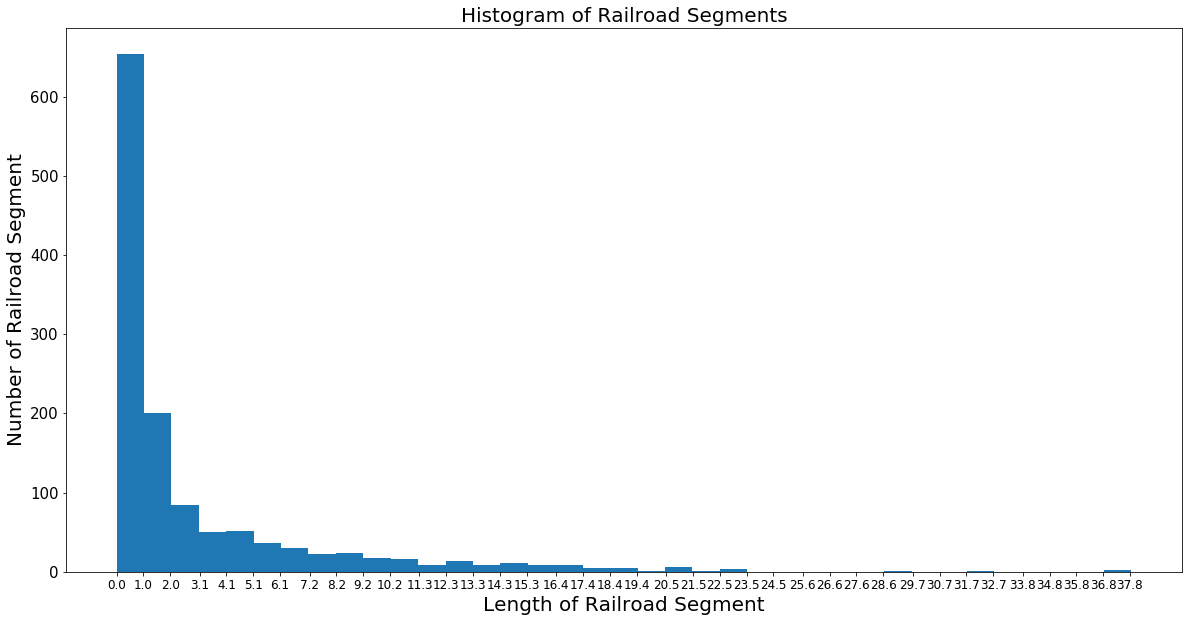

In [69]:
count, bin_edges = np.histogram(df_rail['new_Length_mi'], bins = 37 )


df_rail["new_Length_mi"].plot(kind = 'hist', xticks = bin_edges.round(1), bins = 37, figsize = (20,10))

plt.title('Histogram of Railroad Segments', fontsize = 20)
plt.ylabel('Number of Railroad Segment', fontsize = 20)
plt.xlabel('Length of Railroad Segment', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

In [47]:
file_to_write1 = "C:/Users/jkhat/OneDrive/MarTREC_python/Rail_consolidated_arcs_file_22.csv"
df_rail.to_csv(file_to_write1)

# Road Segments

In [57]:
file2 = "C:/Users/jkhat/OneDrive/MarTREC_python/Road_consolidated_arcs_file_2.csv"
df_road = pd.read_csv(file2)

In [58]:
print(df_road.shape)
df_road.head()

(4462, 10)


,FID,Start_Node,End_Node,Mode,X_Start,Y_Start,X_End,Y_End,Length_mi,Traversal time
0,8592,7176,7469,Road,-94.575309,36.275895,-94.579129,36.384660,7.927775,1.0
1,8269,7176,7185,Road,-94.575309,36.275895,-94.582566,36.278307,0.438233,1.0
2,7876,6820,6836,Road,-94.541508,36.172397,-94.565201,36.176384,1.365337,1.0
3,7908,6820,6862,Road,-94.541508,36.172397,-94.541441,36.183282,0.750984,1.0
4,7857,6820,6821,Road,-94.541508,36.172397,-94.534347,36.172320,0.400583,1.0


In [59]:
for index, row in df_road.iterrows():
    lat1 = row['Y_Start']
    lat2 = row['Y_End']
    lon1 = row['X_Start']
    lon2 = row['X_End']
    distance_mile = distance(lat1, lat2, lon1, lon2)
    df_road.at[index, 'new_Length_mi'] = distance_mile

In [63]:
df_road.head()

,FID,Start_Node,End_Node,Mode,X_Start,Y_Start,X_End,Y_End,Length_mi,Traversal time,new_Length_mi
0,8592,7176,7469,Road,-94.575309,36.275895,-94.579129,36.384660,7.927775,1.0,7.512677
1,8269,7176,7185,Road,-94.575309,36.275895,-94.582566,36.278307,0.438233,1.0,0.436901
2,7876,6820,6836,Road,-94.541508,36.172397,-94.565201,36.176384,1.365337,1.0,1.348943
3,7908,6820,6862,Road,-94.541508,36.172397,-94.541441,36.183282,0.750984,1.0,0.751537
4,7857,6820,6821,Road,-94.541508,36.172397,-94.534347,36.172320,0.400583,1.0,0.399144


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text yticklabel objects>)

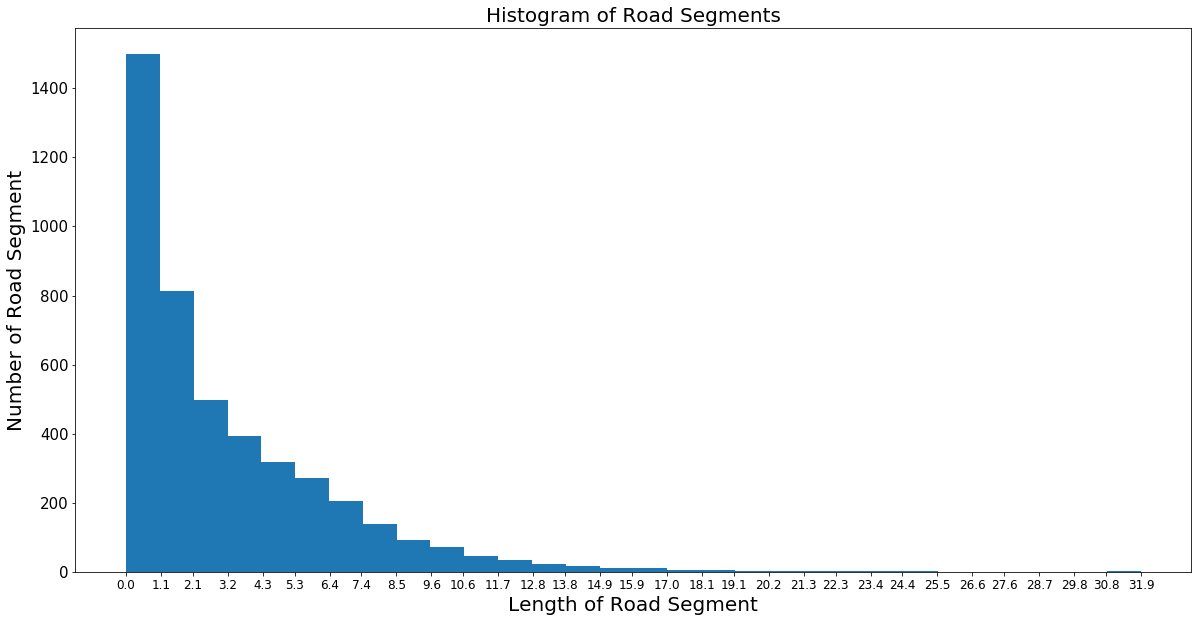

In [65]:
count, bin_edges = np.histogram(df_road['new_Length_mi'], bins = 30 )

df_road["new_Length_mi"].plot(kind = 'hist', xticks = bin_edges.round(1), bins = 30, figsize = (20,10))

plt.title('Histogram of Road Segments', fontsize = 20)
plt.ylabel('Number of Road Segment', fontsize = 20)
plt.xlabel('Length of Road Segment', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

In [64]:
file_to_write2 = "C:/Users/jkhat/OneDrive/MarTREC_python/Road_consolidated_arcs_file_22.csv"
df_road.to_csv(file_to_write2)

# Water Segments

In [71]:
file3 = "C:/Users/jkhat/OneDrive/MarTREC_python/Water_consolidated_arcs_file_2.csv"
df_water = pd.read_csv(file3)

In [72]:
print(df_water.shape)
df_water.head()

(152, 10)


,FID,Start_Node,End_Node,Mode,X_Start,Y_Start,X_End,Y_End,Length_mi,Traversal time
0,3,40004,40003,Water,-94.451303,35.338564,-94.433824,35.388340,4.091127,1.0
1,4,40005,40006,Water,-90.172327,35.052754,-90.177934,35.075144,1.794213,1.0
2,5,40007,40006,Water,-90.083384,35.106164,-90.177934,35.075144,6.784474,1.0
3,6,40008,40006,Water,-90.061974,35.181764,-90.177934,35.075144,12.978118,1.0
4,7,40009,40008,Water,-89.890292,35.164161,-90.061974,35.181764,13.380287,1.0


In [73]:
for index, row in df_water.iterrows():
    lat1 = row['Y_Start']
    lat2 = row['Y_End']
    lon1 = row['X_Start']
    lon2 = row['X_End']
    distance_mile = distance(lat1, lat2, lon1, lon2)
    df_water.at[index, 'new_Length_mi'] = distance_mile

In [74]:
df_water.head()

,FID,Start_Node,End_Node,Mode,X_Start,Y_Start,X_End,Y_End,Length_mi,Traversal time,new_Length_mi
0,3,40004,40003,Water,-94.451303,35.338564,-94.433824,35.388340,4.091127,1.0,3.574935
1,4,40005,40006,Water,-90.172327,35.052754,-90.177934,35.075144,1.794213,1.0,1.578064
2,5,40007,40006,Water,-90.083384,35.106164,-90.177934,35.075144,6.784474,1.0,5.755063
3,6,40008,40006,Water,-90.061974,35.181764,-90.177934,35.075144,12.978118,1.0,9.852524
4,7,40009,40008,Water,-89.890292,35.164161,-90.061974,35.181764,13.380287,1.0,9.765442


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text yticklabel objects>)

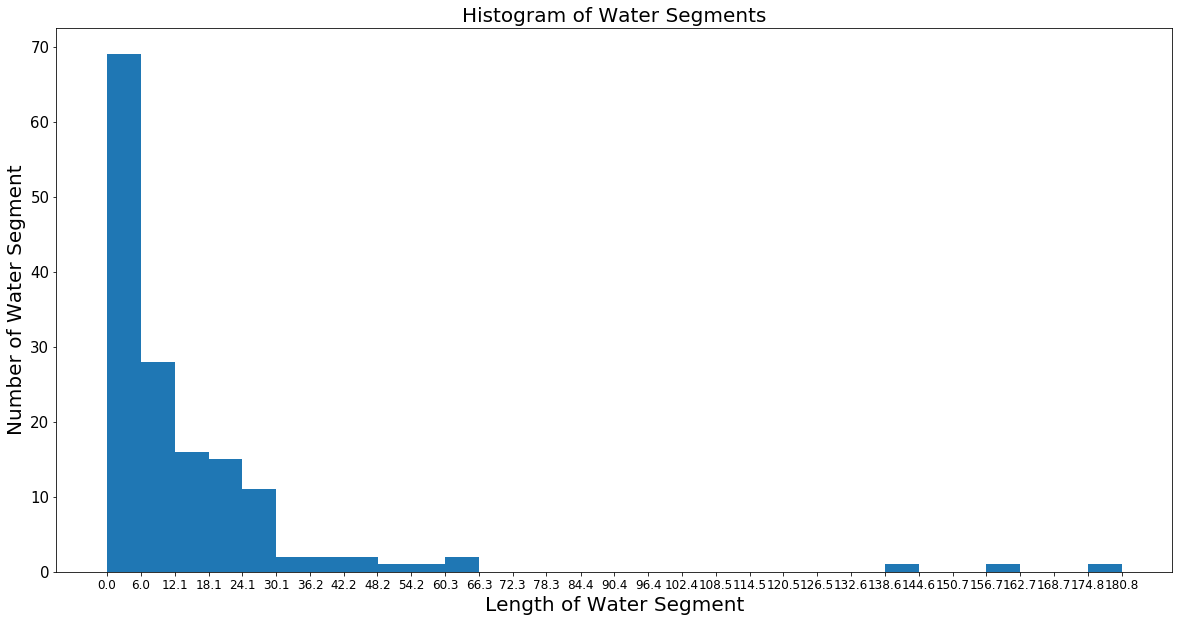

In [81]:
count, bin_edges = np.histogram(df_water['new_Length_mi'], bins = 30 )

df_water["new_Length_mi"].plot(kind = 'hist', xticks = bin_edges.round(1), bins = 30, figsize = (20,10))

plt.title('Histogram of Water Segments', fontsize = 20)
plt.ylabel('Number of Water Segment', fontsize = 20)
plt.xlabel('Length of Water Segment', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

In [78]:
file_to_write3 = "C:/Users/jkhat/OneDrive/MarTREC_python/Water_consolidated_arcs_file_22.csv"
df_water.to_csv(file_to_write3)

### Road speed limits in Arkansas https://en.wikipedia.org/wiki/Speed_limits_in_the_United_States_by_jurisdiction#Arkansas

### and https://www.arkansashighways.com/Trans_Plan_Policy/2017%20Speed%20Limit%20Study%20FINAL.pdf

### Train speed limits in Arkansas https://en.wikipedia.org/wiki/Rail_speed_limits_in_the_United_States

### and https://www.arkansashighways.com/Trans_Plan_Policy/state_rail/AR_StateRailPlan_Final_with_Summary.pdf
### (search for track class)

### https://www.voanews.com/usa/fast-moving-world-slow-going-barges-ply-us-waterways#:~:text=s%20inland%20rivers.,%5B6%20miles%5D%20an%20hour.

### https://www.globalsecurity.org/military/systems/ship/towboat.htm#:~:text=Usually%20barge%20configuration%20on%20the,mph%20to%20about%2011%20mph. (speed) 

### https://en.wikipedia.org/wiki/MV_Mississippi ( barge and speed)

1.2445894158220852 K.M


In [6]:
# arc 591  
lat1 = 34.03469171

lat2 = 34.03854101

lon1 = -94.64902354

lon2 =  -94.63025594

print(distance(lat1, lat2, lon1, lon2), "miles") 

1.1062162322844902 M


In [7]:
# from 30676 to 30765   
lat1 = 34.38270932

lat2 = 34.55541102

lon1 = -92.72716909

lon2 =  -92.57530328

print(distance(lat1, lat2, lon1, lon2), "miles") 

14.728115706222084 M


In [8]:
# arc 692
lat1 = 34.34201201

lat2 = 34.34186801

lon1 = -94.36993627

lon2 =  -94.36368027

print(distance(lat1, lat2, lon1, lon2), "miles") 

0.35679090759804355 M


In [9]:
# arc from 31458 to 70350
lat1 = 36.12531504

lat2 = 36.17266582

lon1 = -94.16747678

lon2 =  -94.53459093

print(distance(lat1, lat2, lon1, lon2), "miles") 

20.727180412628645 miles
